#Akash Singh


In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download phylake1337/fire-dataset

100% 387M/387M [00:16<00:00, 33.7MB/s]
100% 387M/387M [00:16<00:00, 25.0MB/s]


In [ ]:
! unzip fire-dataset.zip

Archive:  fire-dataset.zip
  inflating: fire_dataset/fire_images/fire.1.png  
  inflating: fire_dataset/fire_images/fire.10.png  
  inflating: fire_dataset/fire_images/fire.100.png  
  inflating: fire_dataset/fire_images/fire.101.png  
  inflating: fire_dataset/fire_images/fire.102.png  
  inflating: fire_dataset/fire_images/fire.103.png  
  inflating: fire_dataset/fire_images/fire.104.png  
  inflating: fire_dataset/fire_images/fire.105.png  
  inflating: fire_dataset/fire_images/fire.106.png  
  inflating: fire_dataset/fire_images/fire.107.png  
  inflating: fire_dataset/fire_images/fire.108.png  
  inflating: fire_dataset/fire_images/fire.109.png  
  inflating: fire_dataset/fire_images/fire.11.png  
  inflating: fire_dataset/fire_images/fire.110.png  
  inflating: fire_dataset/fire_images/fire.111.png  
  inflating: fire_dataset/fire_images/fire.112.png  
  inflating: fire_dataset/fire_images/fire.113.png  
  inflating: fire_dataset/fire_images/fire.114.png  
  inflating: fire_datas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image

sns.set_style('darkgrid')

In [ ]:
#create an empty DataFrame
df = pd.DataFrame(columns=['path','label'])

#loop over fire images and label them 1
for dirname, _, filenames in os.walk('/content/fire_dataset/fire_images'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        df = df.append(pd.DataFrame([[os.path.join(dirname, filename),'fire']],columns=['path','label']))


#loop over non fire images and label them 0
for dirname, _, filenames in os.walk('/content/fire_dataset/non_fire_images'):
    for filename in filenames:
        df = df.append(pd.DataFrame([[os.path.join(dirname, filename),'non_fire']],columns=['path','label']))
        #print(os.path.join(dirname, filename))

#shuffle the dataset for redistribute the labels
df = df.sample(frac=1).reset_index(drop=True)
df.head(10)

path     label
0  /content/fire_dataset/non_fire_images/non_fire...  non_fire
1  /content/fire_dataset/non_fire_images/non_fire...  non_fire
2     /content/fire_dataset/fire_images/fire.258.png      fire
3     /content/fire_dataset/fire_images/fire.483.png      fire
4     /content/fire_dataset/fire_images/fire.528.png      fire
5  /content/fire_dataset/non_fire_images/non_fire...  non_fire
6     /content/fire_dataset/fire_images/fire.107.png      fire
7  /content/fire_dataset/non_fire_images/non_fire...  non_fire
8  /content/fire_dataset/non_fire_images/non_fire...  non_fire
9     /content/fire_dataset/fire_images/fire.388.png      fire

The shuffling has taken place well.

Let's visualize the countplot of the data

In [ ]:
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "xy"}, {"type": "pie"}]])


fig.add_trace(go.Bar(x =df['label'].value_counts().index,y=df['label'].value_counts().to_numpy(),marker_color=['darkorange','green'],showlegend=False),row=1,col=1)

fig.add_trace(go.Pie(
     values=df['label'].value_counts().to_numpy(),
     labels=df['label'].value_counts().index,
    marker=dict(colors=['darkorange','green'])),
    row=1, col=2)

Non fire label has less number of images. The dataset is imbalanced

**Visualizing the images with fire**

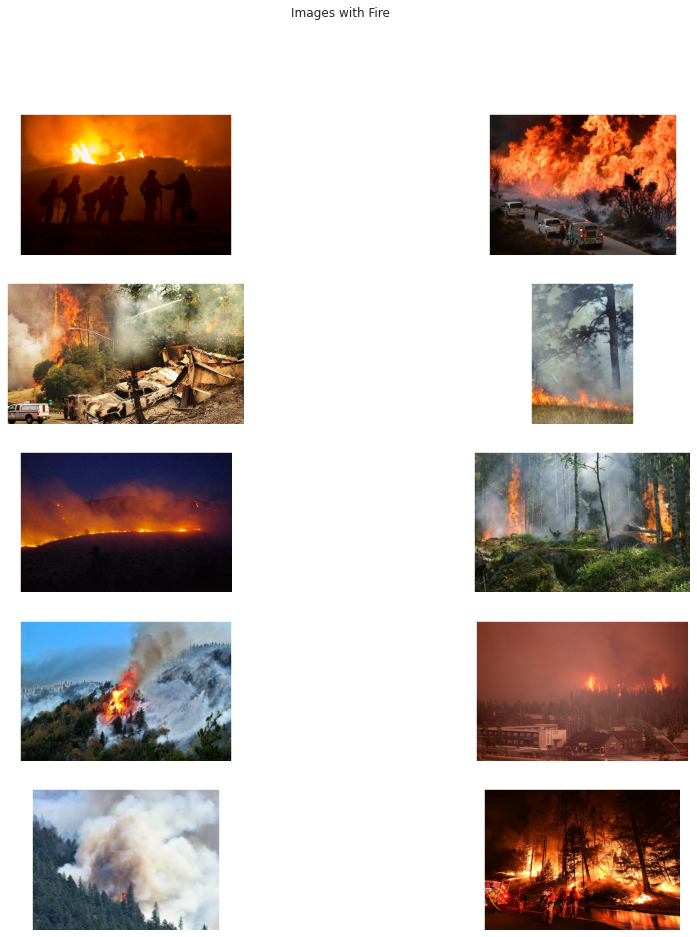

In [ ]:
label = 'fire' #label for images with fire
data = df[df['label'] == label]
sns.set_style('dark')


pics = 10 #set the number of pics
fig,ax = plt.subplots(int(pics//2),2,figsize=(15,15))
plt.suptitle('Images with Fire')
ax = ax.ravel()
for i in range((pics//2)*2):
    path = data.sample(1).loc[:,'path'].to_numpy()[0]
    img = image.load_img(path)
    img = image.img_to_array(img)/255
    ax[i].imshow(img)
    ax[i].axes.xaxis.set_visible(False)
    ax[i].axes.yaxis.set_visible(False)


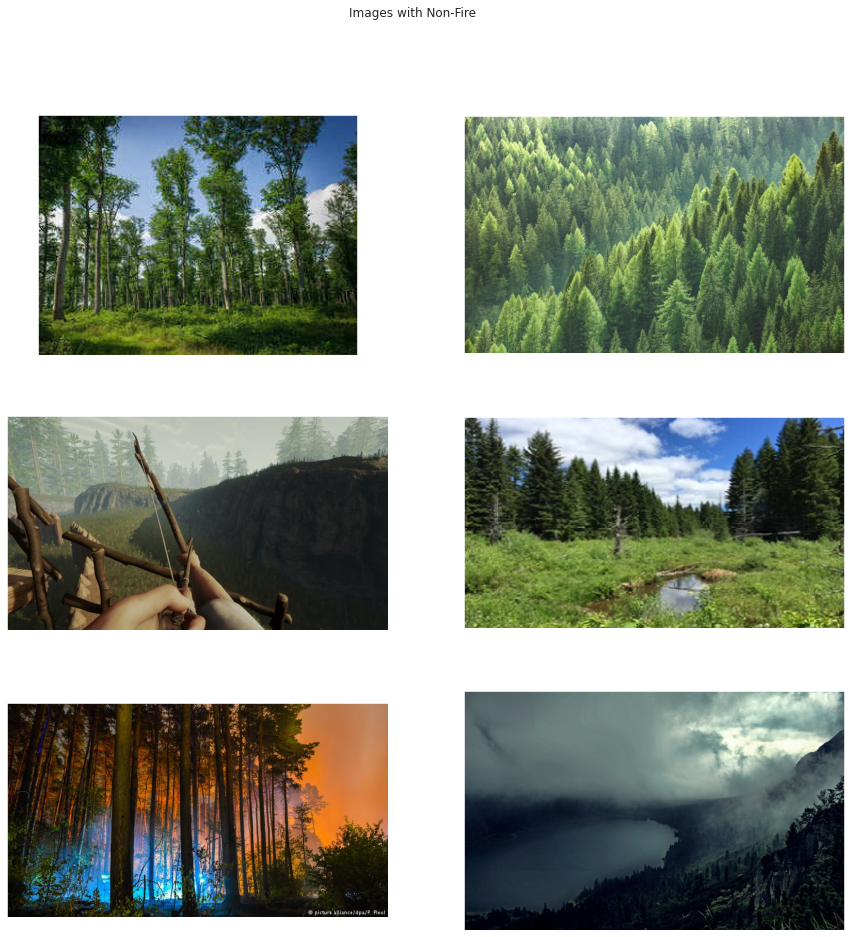

In [ ]:
label = 'non_fire' #label for images without fire
data = df[df['label'] == label]
sns.set_style('dark')


pics = 6 #set the number of pics
fig,ax = plt.subplots(int(pics//2),2,figsize=(15,15))
plt.suptitle('Images with Non-Fire')
ax = ax.ravel()
for i in range((pics//2)*2):
    path = data.sample(1).loc[:,'path'].to_numpy()[0]
    img = image.load_img(path)
    img = image.img_to_array(img)/255
    ax[i].imshow(img)
    ax[i].axes.xaxis.set_visible(False)
    ax[i].axes.yaxis.set_visible(False)

**As you can see, the sizes of the images are different. Let's visualize the distribution of their shapes**

In [ ]:
def shaper(row):
    shape = image.load_img(row['path']).size
    row['height'] = shape[1]
    row['width'] = shape[0]
    return row
df = df.apply(shaper,axis=1)
df.head(5)

path     label  height  width
0  /content/fire_dataset/non_fire_images/non_fire...  non_fire     440    660
1  /content/fire_dataset/non_fire_images/non_fire...  non_fire     768   1920
2     /content/fire_dataset/fire_images/fire.258.png      fire     338    600
3     /content/fire_dataset/fire_images/fire.483.png      fire     415    992
4     /content/fire_dataset/fire_images/fire.528.png      fire     513    892

Visualizing Shape Distribution

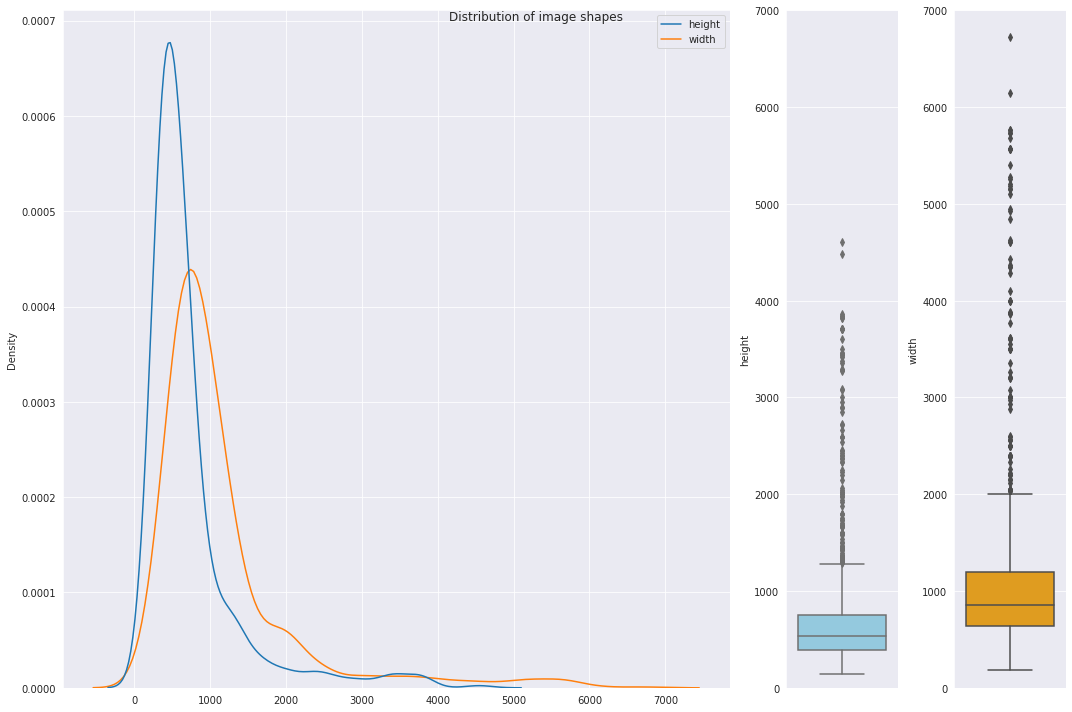

In [ ]:
sns.set_style('darkgrid')
fig,(ax1,ax2,ax3) = plt.subplots(1,3,gridspec_kw={'width_ratios': [3,0.5,0.5]},figsize=(15,10))
sns.kdeplot(data=df.drop(columns=['path','label']),ax=ax1,legend=True)
sns.boxplot(data=df,y='height',ax=ax2,color='skyblue')
sns.boxplot(data=df,y='width',ax=ax3,color='orange')
plt.suptitle('Distribution of image shapes')
ax3.set_ylim(0,7000)
ax2.set_ylim(0,7000)
plt.tight_layout()

The height and width of images vary too much. We have to reshape them to a fixed shape before **training**

**Image Generation or Augmentation**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
generator = ImageDataGenerator(
    rotation_range= 20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range = 2,
    zoom_range=0.2,
    rescale = 1/255,
    validation_split=0.2,
)

Creating the training and test generator

We will use the flow_from_dataframe method of the ImageDataGenerator class. It will take the path of the images from the dataframe along with their labels. We construct two generators, one for training and the other for validation.

Note: Our labels are strings 'fire ' and 'non_fire'. Image generator will automatically encode them to integer labels.

In [ ]:
train_gen = generator.flow_from_dataframe(df,x_col='path',y_col='label',images_size=(256,256),class_mode='binary',subset='training')
val_gen = generator.flow_from_dataframe(df,x_col='path',y_col='label',images_size=(256,256),class_mode='binary',subset='validation')


Found 800 validated image filenames belonging to 2 classes.
Found 199 validated image filenames belonging to 2 classes.


Class indices assigned by the Image generator

In [ ]:
class_indices = {}
for key in train_gen.class_indices.keys():
    class_indices[train_gen.class_indices[key]] = key
    
print(class_indices)

{0: 'fire', 1: 'non_fire'}


**Hence an image predicted 0 will contain fire and 1 with non-fire.**


**Visualizing the generated images in training set**

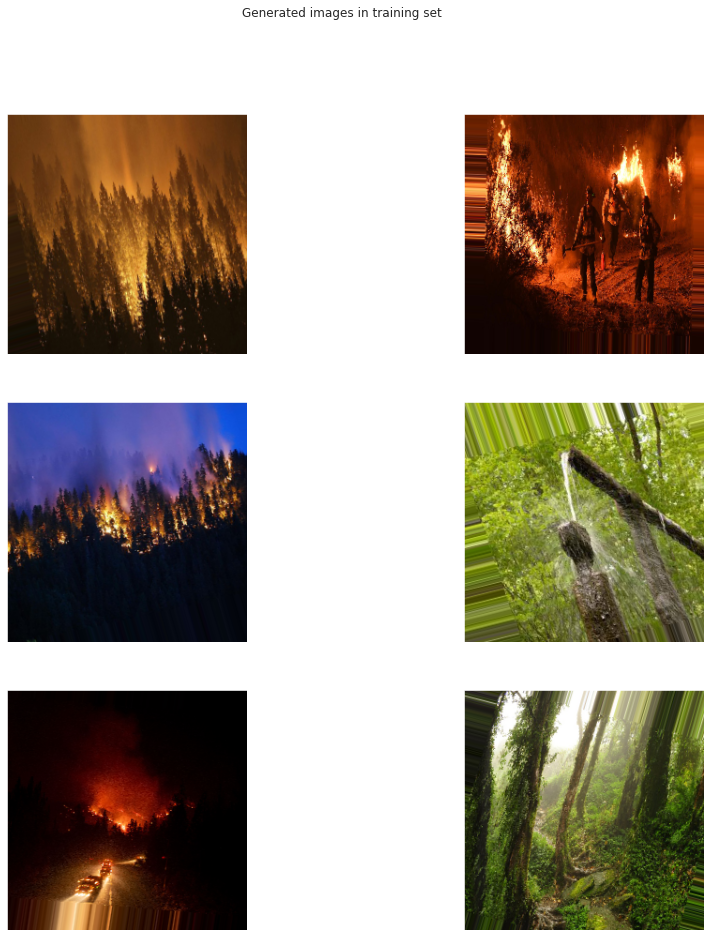

In [ ]:
sns.set_style('dark')
pics = 6 #set the number of pics
fig,ax = plt.subplots(int(pics//2),2,figsize=(15,15))
plt.suptitle('Generated images in training set')
ax = ax.ravel()
for i in range((pics//2)*2):
    ax[i].imshow(train_gen[0][0][i])
    ax[i].axes.xaxis.set_visible(False)
    ax[i].axes.yaxis.set_visible(False)

**Creating the model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size = (2,2),activation='relu',input_shape = (256,256,3)))
model.add(MaxPool2D())
model.add(Conv2D(filters=64,kernel_size=(2,2),activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(filters=128,kernel_size=(2,2),activation='relu'))
model.add(MaxPool2D())
model.add(Flatten()) 
model.add(Dense(64,activation='relu'))   
model.add(Dense(32,activation = 'relu'))   #fully connected layer
model.add(Dense(1,activation = 'sigmoid'))  #output

We increase the number of filters as we add more layers because initially there will be a lot of noise present in the input and we only need to capture the important information. Later as we progress through the layers, the feature maps become nuanced and we try to capture them with more filters

**Model Summary**

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 255, 255, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 64)      8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 62, 62, 128)       32896     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 128)      0

**Compiling the model**

In [ ]:
from tensorflow.keras.metrics import Recall,AUC
from tensorflow.keras.utils import plot_model

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy',Recall(),AUC()])

**Defining Callbacks**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
early_stoppping = EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)
reduce_lr_on_plateau = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=5)

**Model Fitting**

In [ ]:
model.fit(x=train_gen,batch_size=32,epochs=15,validation_data=val_gen,callbacks=[early_stoppping,reduce_lr_on_plateau])

Epoch 1/15
25/25 [==============================] - 51s 2s/step - loss: 0.4141 - accuracy: 0.8163 - recall: 0.6766 - auc: 0.8671 - val_loss: 0.1389 - val_accuracy: 0.9246 - val_recall: 0.6512 - val_auc: 0.9935 - lr: 0.0010
Epoch 2/15
25/25 [==============================] - 37s 2s/step - loss: 0.1276 - accuracy: 0.9400 - recall: 0.8557 - auc: 0.9873 - val_loss: 0.1048 - val_accuracy: 0.9548 - val_recall: 0.8372 - val_auc: 0.9900 - lr: 0.0010
Epoch 3/15
25/25 [==============================] - 38s 2s/step - loss: 0.1330 - accuracy: 0.9500 - recall: 0.8706 - auc: 0.9847 - val_loss: 0.0961 - val_accuracy: 0.9548 - val_recall: 0.8372 - val_auc: 0.9946 - lr: 0.0010
Epoch 4/15
25/25 [==============================] - 38s 2s/step - loss: 0.1094 - accuracy: 0.9550 - recall: 0.8706 - auc: 0.9884 - val_loss: 0.1059 - val_accuracy: 0.9698 - val_recall: 0.9535 - val_auc: 0.9913 - lr: 0.0010
Epoch 5/15
25/25 [==============================] - 38s 2s/step - loss: 0.0880 - accuracy: 0.9675 - recall: 

**Model Evaluation**


Plotting metrics

In [ ]:
history= model.history.history
px.line(history,title = "Metrics Plot")

In [ ]:
eval_list = model.evaluate(val_gen,return_dict=True)
for metric in eval_list.keys():
    print(metric+f": {eval_list[metric]:.2f}")

7/7 [==============================] - 6s 892ms/step - loss: 0.1809 - accuracy: 0.9598 - recall: 0.8605 - auc: 0.9793
loss: 0.18
accuracy: 0.96
recall: 0.86
auc: 0.98


**Model creation by transfer learning**

In [ ]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout

In [ ]:
xception = Xception(include_top = False,input_shape = (256,256,3))
input_to_model = xception.input
#turn off training
xception.trainable = False

x = Flatten()(xception.output)
x = Dense(64,activation = 'relu')(x)
output_to_model = Dense(1,activation = 'sigmoid')(x)
model2 = Model(inputs = input_to_model,outputs = output_to_model)

83697664/83683744 [==============================] - 1s 0us/step


**Compiling the model**

In [ ]:
model2.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy',Recall(),AUC()])

**Fitting the model**

In [ ]:
history2 = model2.fit(x = train_gen,batch_size=32,epochs=15,callbacks = [early_stoppping,reduce_lr_on_plateau],validation_data = val_gen)

Epoch 1/15
25/25 [==============================] - 271s 11s/step - loss: 1.0703 - accuracy: 0.9125 - recall_1: 0.7828 - auc_1: 0.9111 - val_loss: 0.4899 - val_accuracy: 0.9548 - val_recall_1: 0.8913 - val_auc_1: 0.9545 - lr: 0.0010
Epoch 2/15
25/25 [==============================] - 277s 11s/step - loss: 0.1410 - accuracy: 0.9650 - recall_1: 0.9293 - auc_1: 0.9833 - val_loss: 0.3066 - val_accuracy: 0.9397 - val_recall_1: 0.9565 - val_auc_1: 0.9714 - lr: 0.0010
Epoch 3/15
25/25 [==============================] - 272s 11s/step - loss: 0.2071 - accuracy: 0.9563 - recall_1: 0.9141 - auc_1: 0.9714 - val_loss: 0.3752 - val_accuracy: 0.9749 - val_recall_1: 0.9130 - val_auc_1: 0.9729 - lr: 0.0010
Epoch 4/15
25/25 [==============================] - 272s 11s/step - loss: 0.1416 - accuracy: 0.9737 - recall_1: 0.9343 - auc_1: 0.9839 - val_loss: 0.3275 - val_accuracy: 0.9598 - val_recall_1: 0.8696 - val_auc_1: 0.9724 - lr: 0.0010
Epoch 5/15
25/25 [==============================] - 275s 11s/step - 

Model Evaluation

In [ ]:
history2= model2.history.history
px.line(history2,title='Metrics Plot')

In [ ]:
eval_list = model.evaluate(val_gen,return_dict=True)
for metric in eval_list.keys():
    print(metric+f": {eval_list[metric]:.2f}")

7/7 [==============================] - 6s 880ms/step - loss: 0.1230 - accuracy: 0.9598 - recall: 0.8837 - auc: 0.9818
loss: 0.12
accuracy: 0.96
recall: 0.88
auc: 0.98


**Example**

In [ ]:
#Downloading the image
!curl https://static01.nyt.com/images/2021/02/19/world/19storm-briefing-texas-fire/19storm-briefing-texas-fire-articleLarge.jpg --output predict.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 50241  100 50241    0     0   114k      0 --:--:-- --:--:-- --:--:--  114k


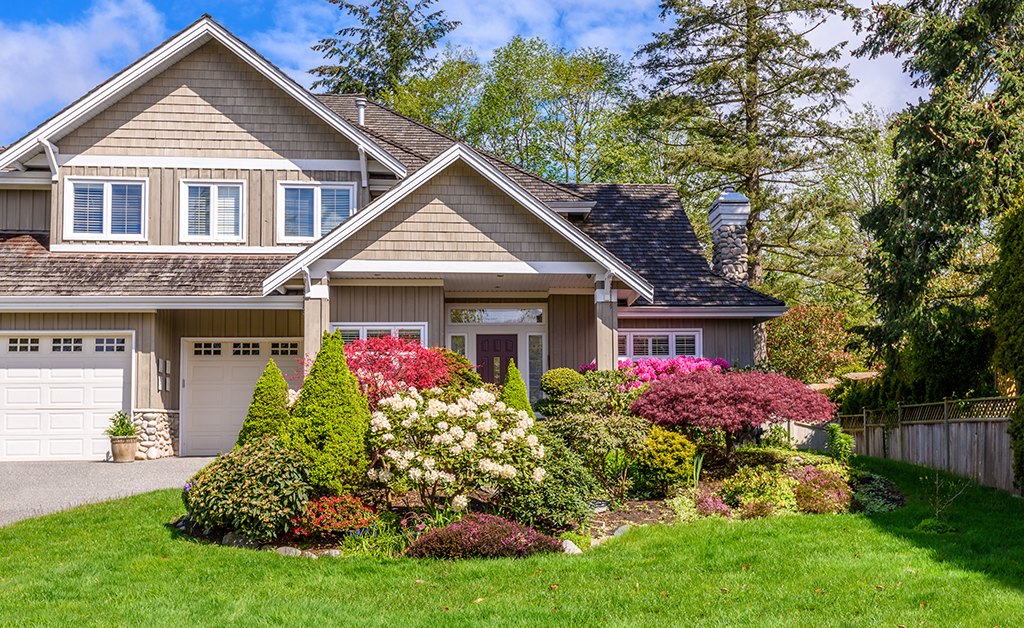

In [ ]:
#Non-fire image
img1 = image.load_img('/content/main-8.jpg')
img1

Printing the text

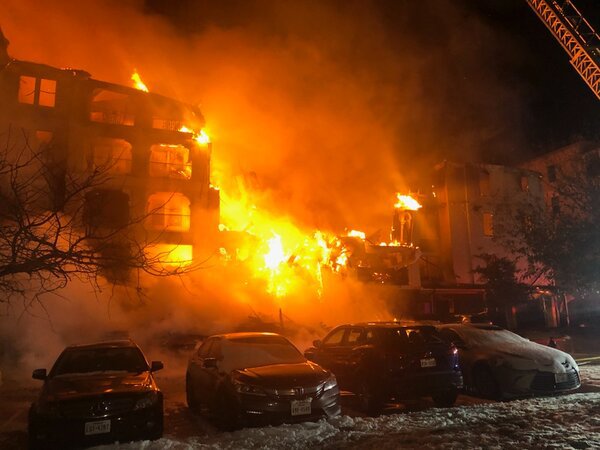

In [ ]:
#loading the fire image
img = image.load_img('predict.jpg')
img

Resizing the image and expanding its dimension to include the batch size - 1

In [ ]:
img = image.img_to_array(img)/255
img = tf.image.resize(img,(256,256))
img = tf.expand_dims(img,axis=0)

print("Image Shape",img.shape)

Image Shape (1, 256, 256, 3)


In [ ]:
img1 = image.img_to_array(img1)/255
img1 = tf.image.resize(img1,(256,256))
img1 = tf.expand_dims(img1,axis=0)

print("Image Shape",img1.shape)

Image Shape (1, 256, 256, 3)


**Prediction**

In [ ]:
#prediction for fire
#using model 1 [CNN]
prediction = int(tf.round(model.predict(x=img)).numpy()[0][0])
print("The predicted value is: ",prediction,"and the predicted label is:",class_indices[prediction])

The predicted value is:  0 and the predicted label is: fire


In [ ]:
#prediction for fire
#using model 2 [Transfer Learning]
prediction = int(tf.round(model2.predict(x=img)).numpy()[0][0])
print("The predicted value is: ",prediction,"and the predicted label is:",class_indices[prediction])

The predicted value is:  0 and the predicted label is: fire


In [ ]:
#prediction for non-fire
#using model 1 [CNN]
prediction = int(tf.round(model.predict(x=img1)).numpy()[0][0])
print("The predicted value is: ",prediction,"and the predicted label is:",class_indices[prediction])

The predicted value is:  1 and the predicted label is: non_fire


In [ ]:
#prediction for non-fire
#using model 2 [Transfer Learning]
prediction = int(tf.round(model2.predict(x=img1)).numpy()[0][0])
print("The predicted value is: ",prediction,"and the predicted label is:",class_indices[prediction])

The predicted value is:  1 and the predicted label is: non_fire
